In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
# import mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
# scale the pixel intensities down to the 0–1 range
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
# list of class names 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
# create NN model 
model = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]), 
                                 keras.layers.Dense(300, activation="relu"), 
                                 keras.layers.Dense(100, activation="relu"), 
                                 keras.layers.Dense(10, activation="softmax")])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
# access layer params 
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.03475694,  0.05984093, -0.01572903, ...,  0.02326059,
         0.03548027,  0.05053975],
       [ 0.06371142, -0.04221442, -0.03557656, ...,  0.02168167,
        -0.04384533, -0.06878237],
       [-0.03555876,  0.05348988,  0.04750059, ..., -0.06675721,
        -0.01222615, -0.03795541],
       ...,
       [ 0.07152736,  0.02175463,  0.03150484, ..., -0.05163743,
        -0.05070277, -0.00709917],
       [ 0.0030085 ,  0.04634476, -0.03246346, ..., -0.04977061,
         0.04853047, -0.00991305],
       [-0.05861399, -0.06694447, -0.01807927, ...,  0.01926249,
        -0.06849589,  0.04577186]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

In [19]:
# compile the model 
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
                  metrics=["accuracy"])

# "sparse_categorical_cross entropy" loss because we have sparse labels and exclusive classes
# "sdg" is stochastic gradient decent. Learning rate defaults to 0.01

In [20]:
# train the model 
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6997 - accuracy: 0.7727 - val_loss: 0.5041 - val_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4824 - accuracy: 0.8314 - val_loss: 0.4304 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4389 - accuracy: 0.8471 - val_loss: 0.4098 - val_accuracy: 0.8620
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4118 - accuracy: 0.8547 - val_loss: 0.3961 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3917 - accuracy: 0.8623 - val_loss: 0.3871 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3758 - accuracy: 0.8674 - val_loss: 0.3741 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3613 - accuracy: 0.8715 - val_loss: 0.3583 - val_accuracy:

(0.0, 1.0)

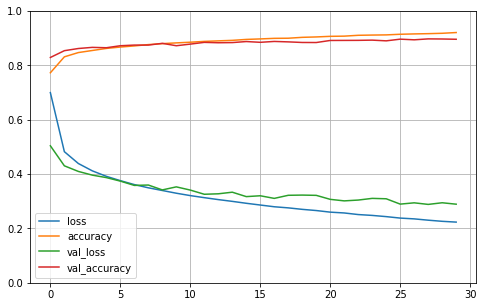

In [23]:
# plot loss function
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [24]:
# evaluate model 
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 55.3877 - accuracy: 0.8597


[55.38774490356445, 0.8597000241279602]

In [25]:
# model predict 
X_new = X_test[:3] # get first 3 items of x_test
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
# transform into class names 
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

###**Building** **a** **Regression** **MLP** **Using** **the** **Sequential** **API**

In [29]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [30]:
# split data into train, test and validation sets 
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)

In [31]:
# normalise data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [34]:
# build model
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), keras.layers.Dense(1)
])

#fit model 
model.compile(loss="mean_squared_error", optimizer="sgd") 
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid)) 

# evaluate model
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8809 - val_loss: 1.8086
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9797 - val_loss: 0.5605
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4674 - val_loss: 0.4527
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4264 - val_loss: 0.4305
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4046 - val_loss: 0.4104
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3931 - val_loss: 0.3991
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3943 - val_loss: 0.3991
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3820 - val_loss: 0.7001
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5092 - val_loss: 0.4016
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3863 - val_loss: 0.4077